In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')

import wandb
import re

%matplotlib inline

In [23]:
api = wandb.Api()
runs = api.runs("liuyuezhang/bp-rnn")
print("Found %i" % len(runs))

Found 2


In [52]:
df = pd.DataFrame()
for run in runs:
    m = re.match('(.*)_(.*)_(.*)', run.name)
    env = m.group(1)
    method = m.group(2)
    seed = m.group(3)

    temp = run.history()
    temp[''] = method

    df = df.append(temp, ignore_index=True)

df

,_step,train_loss,_runtime,batch,_timestamp,test_acc,epoch,
0,2,0.080220,5.407192,1000.0,1.580564e+09,NaN,NaN,module-rmsprop
1,3,0.027707,7.061599,2000.0,1.580564e+09,NaN,NaN,module-rmsprop
2,5,0.012925,10.615612,4000.0,1.580564e+09,NaN,NaN,module-rmsprop
3,6,0.063987,12.463056,5000.0,1.580564e+09,NaN,NaN,module-rmsprop
4,7,0.010613,14.370408,6000.0,1.580564e+09,NaN,NaN,module-rmsprop
...,...,...,...,...,...,...,...,...
985,604,0.000309,852.238115,594000.0,1.580564e+09,NaN,NaN,pytorch-rmsprop
986,606,0.000727,854.721445,596000.0,1.580564e+09,NaN,NaN,pytorch-rmsprop
987,607,0.000382,855.983199,597000.0,1.580564e+09,NaN,NaN,pytorch-rmsprop
988,608,0.004179,857.237640,598000.0,1.580564e+09,NaN,NaN,pytorch-rmsprop


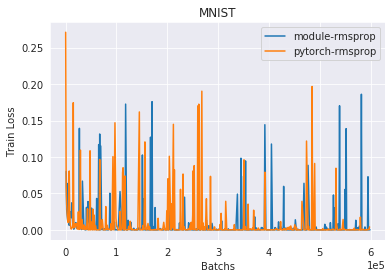

In [70]:
ax = sns.lineplot(x='batch', y='train_loss', hue='', ci=95, n_boot=10, 
                  hue_order=['module-rmsprop', 'pytorch-rmsprop'], 
                  data=df)
ax.set(title='MNIST', xlabel='Batchs', ylabel='Train Loss')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3))
plt.legend(loc='upper right')
plt.savefig('/home/liuyuezhangadam/Desktop/'+env+'_loss.png', dpi=300)

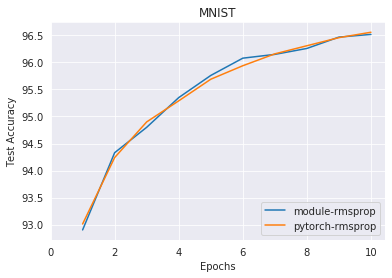

In [71]:
ax = sns.lineplot(x='epoch', y='test_acc', hue='', ci=95, n_boot=10, 
                  hue_order=['module-rmsprop', 'pytorch-rmsprop'], 
                  data=df)
ax.set(title='MNIST', xlabel='Epochs', ylabel='Test Accuracy')
plt.xlim(left=0)
# plt.ylim(bottom=90, top=100)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3))
plt.legend(loc='lower right')
plt.savefig('/home/liuyuezhangadam/Desktop/'+env+'_acc.png', dpi=300)